#**Capstone Project 2**


**<h2>Machine learning-based prediction of COVID-19 diagnosis based on symptom**

**Problem Statement:**<br>
In the context of the ongoing COVID-19 pandemic, there is a critical need for accurate and timely identification of individuals likely to test positive for COVID-19 based on their symptoms and demographic information. This study aims to develop a predictive model using machine learning algorithms to enhance the understanding of factors influencing COVID-19 diagnosis.

1. **Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?**
   - In today's world, predicting diseases accurately is crucial because it helps doctors provide better treatment. If we know early on who might have a disease, we can take care of them sooner and improve their chances of getting better.

2. **How is it going to impact the medical field when it comes to effective screening and reducing health care burden?**
   - It will make a big difference in medicine. By predicting diseases accurately, we can screen people more effectively. This means we can find out who might be sick and help them sooner. This not only helps the person but also makes it easier for hospitals and doctors because they can plan better for the number of sick people.

3. **If any, what is the gap in the knowledge or how your proposed method can be helpful if required in the future for any other disease?**
   - I think right now, there are things we don't fully understand about predicting diseases and the data which i provided was good enough to predict the corona through disease with maximum accuracy. Our proposed method aims to fill these gaps in knowledge. If successful, it can be a useful way not just for predicting COVID-19 but also for other diseases that might come up in the future. It's like having a tool that can be adapted to help with different health challenges.

<H1>Data Undersatnding and Data Exploration

### Data Analysis Approach:

#### Approach to Prove or Disprove Hypothesis:
To validate the hypothesis related to COVID-19 diagnosis, I will adopt the following steps:

1. **Exploratory Data Analysis (EDA):**
   - Thoroughly explore the dataset to grasp its structure
   - Visualize feature distributions to identify potential patterns and variations.

2. **Statistical Analysis:**
   - Conduct statistical tests (e.g., chi-square for categorical variables, correlation for numerical variables) to assess feature significance.

3. **Feature Importance Analysis:**
   - Utilize machine learning models to determine feature importance.
   - Identify key features contributing to COVID-19 diagnosis prediction.

4. **Data Visualization:**
   - Create visualizations (bar charts, histograms, heatmaps) to illustrate feature relationships.
   

### Feature Engineering Techniques:

**1. Data Cleaning:**
   - **Wrong Data:** Replace incorrect values.
   - **Wrong Data Type:** Convert to the correct data type.
   - **Duplicates:** Remove duplicate entries.
   - **Missing Values:**
     - **Remove:** If a variable has over 30% missing data, consider removing it.
     - **Replace:**
       - Statistically replace with Mean, Median, or Mode based on variable type.

**2. Encoding Categorical Variables:**
   - Convert categorical variables to numerical representations using techniques like one-hot encoding or label encoding.

**3. Handling Missing Data:**
   - Impute missing values using statistical methods:
     - Research and confirm with the team before deciding to remove or replace.
     - Replace statistically with Mean, Median, or Mode based on the variable type.

**4. Feature Importance Analysis:**
   - Utilize machine learning models to identify and focus on key features contributing to COVID-19 diagnosis prediction.


In [3]:
#importing fils from desktop to google colab using inbuilt function
from google.colab import files
#uploaded = files.upload()

In [4]:
#reading the files to DataFrame object 'DF'
#creating a dataframe
import pandas as pd
df=pd.read_csv("/content/corona_tested_006.csv")

<ipython-input-4-6f9a55d14b40>:4: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/corona_tested_006.csv")


In [5]:
#exploring the first 5 columns of the DataFrame
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [6]:
print(df.shape)                     #shape of the DataFrame
print(list(df.columns))             #name of all columns printed as list for easy identification


(278848, 11)
['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact']


In [7]:
df.info()                            #detecting non-null values & Dtype of all the cloumns in DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [8]:
type(df)              # checking the type of DataFrame

pandas.core.frame.DataFrame

In [9]:
df.nunique()  #no of unique values in df


Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

In [10]:
import numpy as np
#extracting columns as array
c=np.array(df.columns)
c=c[2:]
c

array(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact'],
      dtype=object)

In [11]:
#unique value counts of each column
for column in c:
    value_counts = df[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")


Value counts for Cough_symptoms:
False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

Value counts for Fever:
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

Value counts for Sore_throat:
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

Value counts for Shortness_of_breath:
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

Value counts for Headache:
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

Value counts for Corona:
negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

Value counts for Age_60_above:
None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

Value counts for Sex:
female    130158
male      129127
None 

<h1>columns which are  Continous:</h1>
1. Test_Date
<h1>columns which are Discrete <br></h1>
1.Ind_ID<br>
2.Cough_symptoms<br>
3.Fever<br>
4.Sore_throat<br>
5.Shortness_of_breath<br>
6.Headache<br>
7.Corona<br>
8.Age_60_above<br>
9.Sex<br>
10.Known_contact<br>

**Null values Detection**

In [12]:
#checking the null values  and getting the total of null values from each column
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

**IND_ID COLUMN**

In [13]:
#checking the columns values
df["Ind_ID"].value_counts().sum()

278848

In [14]:
#converting Test_Date into "date" datatype format
df['Test_date']=df['Test_date'].astype('datetime64')
df['Test_date']


<ipython-input-14-f0e0a3848f03>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Test_date']=df['Test_date'].astype('datetime64')


0        2020-11-03
1        2020-11-03
2        2020-11-03
3        2020-11-03
4        2020-11-03
            ...    
278843   2020-04-30
278844   2020-04-30
278845   2020-04-30
278846   2020-04-30
278847   2020-04-30
Name: Test_date, Length: 278848, dtype: datetime64[ns]

**cough_column** :

In [15]:
# verifying the % of False and True in the column coungh_symptoms
(df['Cough_symptoms'].value_counts()/len(df))*100

False    45.734952
FALSE    39.030942
TRUE      7.883506
True      7.260228
None      0.090372
Name: Cough_symptoms, dtype: float64

In [16]:
#printing the mode & Unique values of the Cough_symptoms column

print(df["Cough_symptoms"].mode())
print(df["Cough_symptoms"].unique())

0    False
Name: Cough_symptoms, dtype: object
['TRUE' 'FALSE' 'None' False True]


In [17]:
# replacing the "Nnone" values with the "mode" value" bcz its a categorical Vaiable

df["Cough_symptoms"]= df['Cough_symptoms'].replace({True:"TRUE",False:'FALSE',"None":"FALSE"})
df["Cough_symptoms"].unique()   # displaying the unique values after the replacement to verify

array(['TRUE', 'FALSE'], dtype=object)

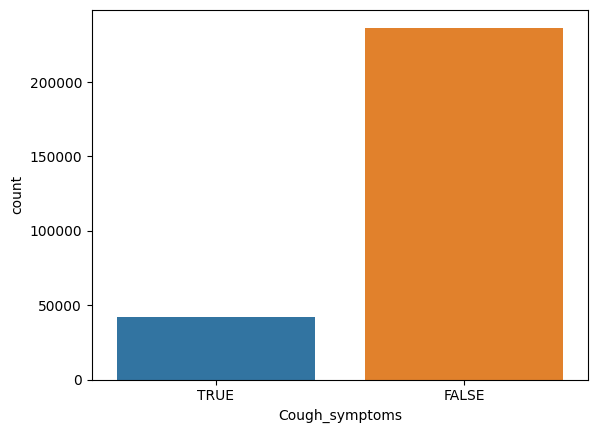

In [18]:
#plotting the count_plot to see the count of each values using seaborn library

import seaborn  as sns # importing the seaborn library
fig=sns.countplot(x="Cough_symptoms", data=df)

**Fever column :**

In [19]:
df["Fever"].unique()         #unique values
df["Fever"].value_counts()   #no of counts of each value in a column

False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

In [20]:
#replacing the "none" values with "mode"
df["Fever"]= df['Fever'].replace({True:"TRUE",False:'FALSE',"None":"FALSE"})

In [21]:
df['Fever'].mode()   # mode

0    FALSE
Name: Fever, dtype: object

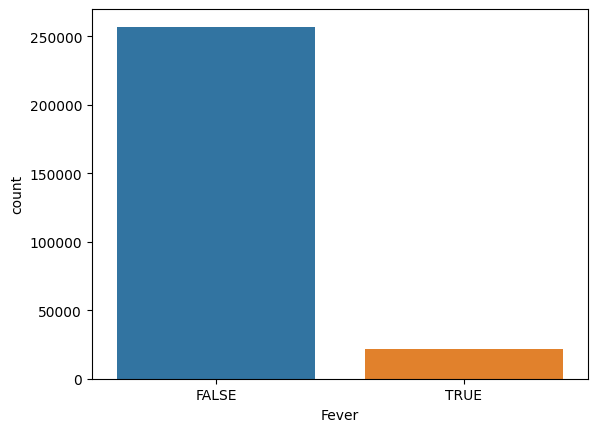

In [22]:
#ploting count_plot fro Fever column of DataFrame
fig=sns.countplot(x="Fever", data=df)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278848 non-null  object        
 3   Fever                278848 non-null  object        
 4   Sore_throat          278848 non-null  object        
 5   Shortness_of_breath  278848 non-null  object        
 6   Headache             278848 non-null  object        
 7   Corona               278848 non-null  object        
 8   Age_60_above         278848 non-null  object        
 9   Sex                  278848 non-null  object        
 10  Known_contact        278848 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.4+ MB


**Sore Throat:**

In [24]:
df["Sore_throat"].value_counts()

False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

In [25]:
#repacing values of Sore_throat column with mode of that column
df["Sore_throat"]= df['Sore_throat'].replace({True:"TRUE",False:'FALSE',"None":"FALSE"})


**Shortness_of_breath** :

In [26]:
#checing any null values or inncorect value counts
df["Shortness_of_breath"].value_counts()

False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

In [27]:
#replacing inncorect values with mode
df["Shortness_of_breath"]= df['Shortness_of_breath'].replace({True:"TRUE",False:'FALSE',"None":"FALSE"})

**Headache**


In [28]:
df["Headache"].value_counts()

False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

In [29]:
df["Headache"]= df['Headache'].replace({True:"TRUE",False:'FALSE',"None":"FALSE"})

**Dependent variable:
Corona**

In [30]:
#counting values to see the data any other than +ve or -ve reported
df["Corona"].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [31]:
#extracting the percentage of values of the column Corona
(df["Corona"].value_counts()/len(df))*100

negative    93.322168
positive     5.282089
other        1.395742
Name: Corona, dtype: float64

In [32]:
#replacing the values with the mode bcz datalost is less than 30%
#i.e <30%
df["Corona"]=df["Corona"].replace({"other":"negative"})

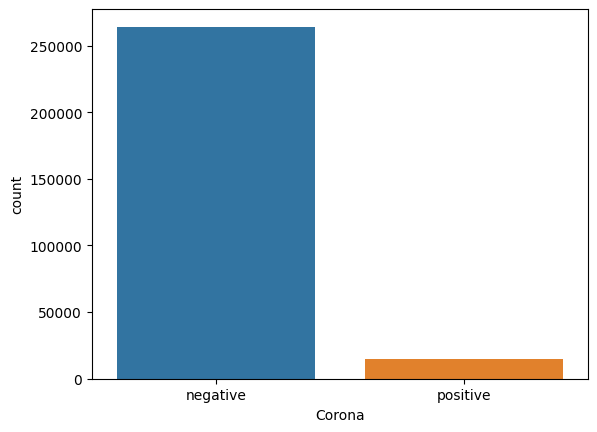

In [33]:
fig=sns.countplot(x="Corona",data=df)

**Sex column :**

In [34]:
df["Sex"].value_counts()/len(df)*100               # checking the missing values %

female    46.677043
male      46.307307
None       7.015650
Name: Sex, dtype: float64

In [35]:
df['Sex'].mode()

0    female
Name: Sex, dtype: object

In [36]:
df["Sex"]=df["Sex"].replace({"None":"female"})

<Axes: xlabel='Sex', ylabel='count'>

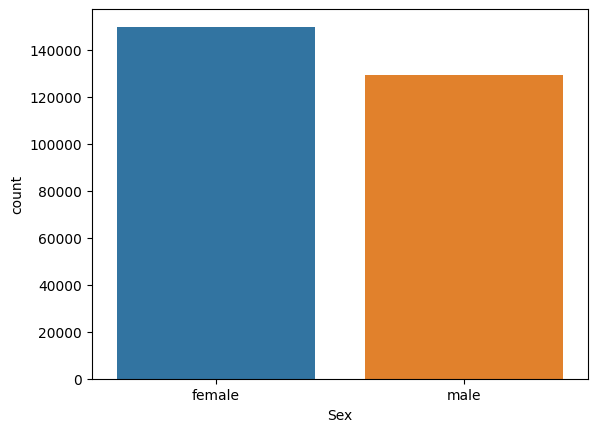

In [37]:
sns.countplot(x="Sex",data=df)                        # visualizing sex column

**Age column**

['None' 'No' 'Yes']


None    45.659284
No      45.079398
Yes      9.261318
Name: Age_60_above, dtype: float64

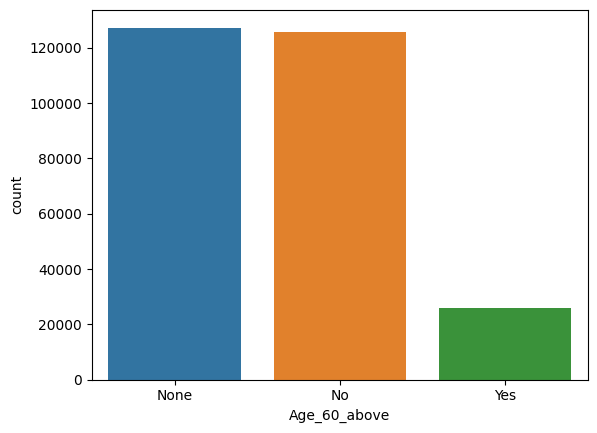

In [38]:
print(df["Age_60_above"].unique())                    # checking the diffrent category along with null values if any
sns.countplot(x="Age_60_above",data=df)               # countplot to see counts of different values
df["Age_60_above"].value_counts()/len(df)*100         #percentage of each values in this column

In [39]:
df["Age_60_above"].mode()
df["Age_60_above"]=df["Age_60_above"].replace({"None":"No"})

In [40]:
df["Known_contact"].mode()
df["Known_contact"]=df["Known_contact"].replace({"Othe":"Other"})

**Known Contact :**

<Axes: xlabel='Known_contact', ylabel='count'>

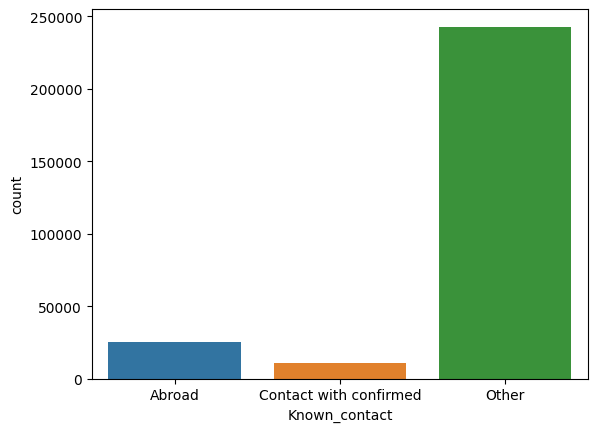

In [41]:
df["Known_contact"].value_counts()
sns.countplot(x="Known_contact",data=df)

Checking the duplicate rows in the DataFrame :

In [42]:
  df[df.duplicated()]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


In [43]:
df["Known_contact"].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

**HEAT MAP BEWTEEN INDEPENDENCE VARIABLES AND CORONA VARIABLE**

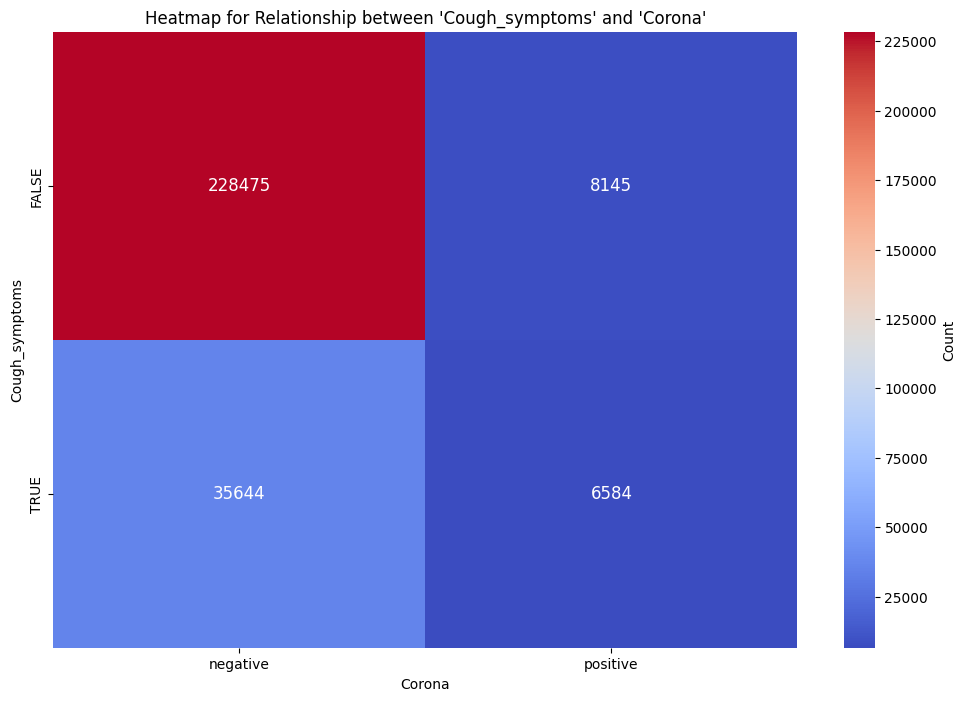

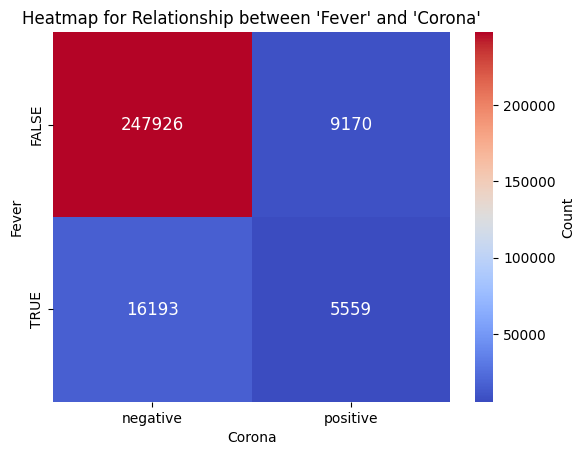

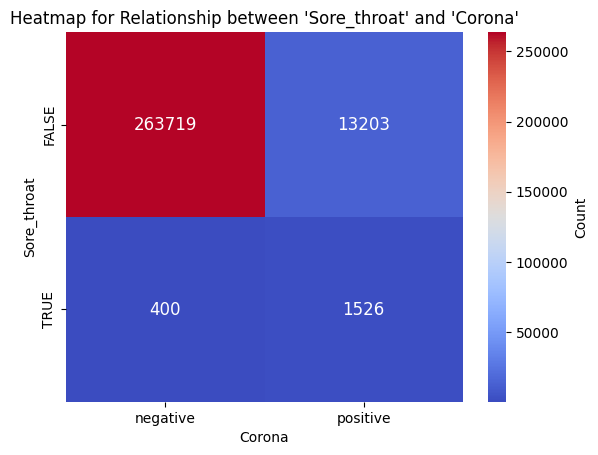

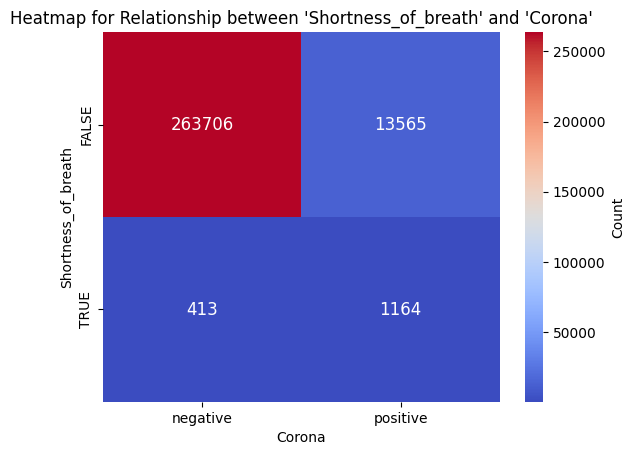

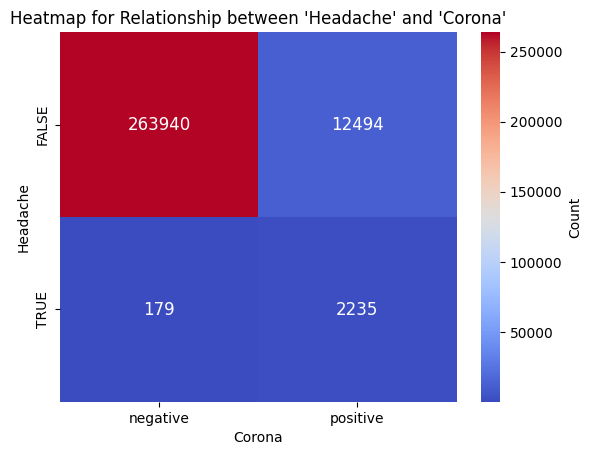

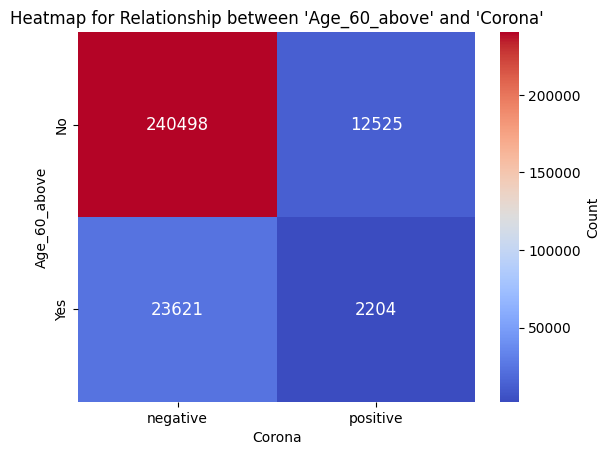

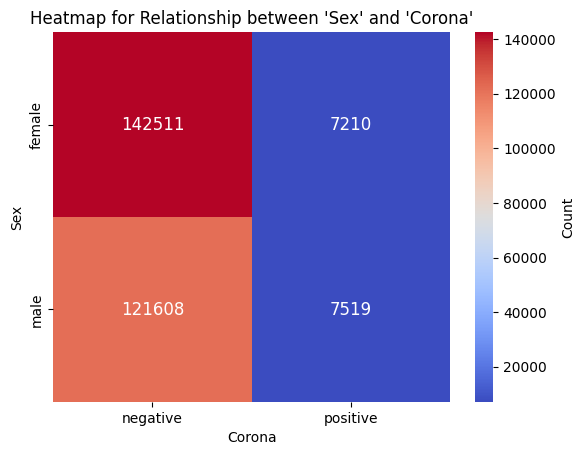

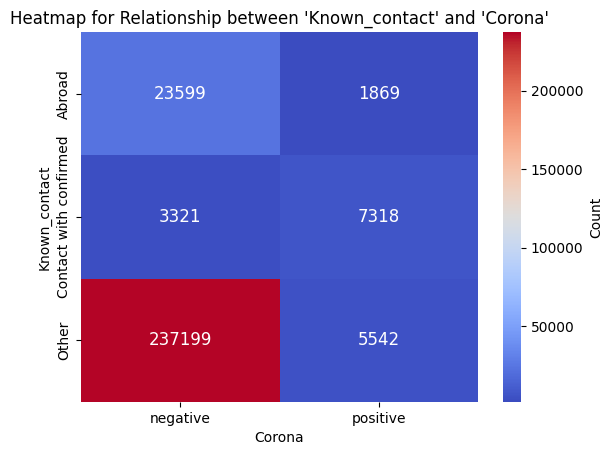

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']

plt.figure(figsize=(12, 8))

for column in columns_to_plot:
    cross_tab = pd.crosstab(df[column], df['Corona'])
    sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='g', annot_kws={"size": 12}, cbar_kws={'label': 'Count'})
    plt.title(f"Heatmap for Relationship between '{column}' and 'Corona'")
    plt.show()


In [45]:
DF=df

--------------------------------------------------------------------------------------------

#Initial Hypothesis
**<h3>Assumption</h3>**<br>
1.Null Hypothesis (h0): There is no association between age, gender, known contact, and the likelihood of testing positive for COVID-19.

2.Null Hypothesis (h0): There is no association between symptoms (cough, fever, shortness of breath) and the likelihood of testing positive for COVID-19.


**Converting Data From One Format To Another :**

In [46]:
names = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache','Age_60_above','Sex']
df[names] = df[names].astype("category")                  #conversion using astype

In [47]:
df['Corona'] =df['Corona'].astype('category')            #making the output variable as category variable

**Getting Dummies :**

In [48]:
# Getting dummies and adding them to the DataFrame
df[names] =pd.get_dummies(df[names],drop_first=True)
df = pd.concat([df, pd.get_dummies(df['Known_contact'], prefix='Known_contact', drop_first=True)], axis=1)

# Dropping the original 'Known_contact' column if needed
df = df.drop('Known_contact', axis=1)

# Display the resulting DataFrame
df.head()


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact_Contact with confirmed,Known_contact_Other
0,1,2020-11-03,1,0,1,0,0,negative,0,0,0,0
1,2,2020-11-03,0,1,0,0,0,positive,0,0,0,0
2,3,2020-11-03,0,1,0,0,0,positive,0,0,0,0
3,4,2020-11-03,1,0,0,0,0,negative,0,0,0,0
4,5,2020-11-03,1,0,0,0,0,negative,0,0,1,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Ind_ID                                278848 non-null  int64         
 1   Test_date                             278848 non-null  datetime64[ns]
 2   Cough_symptoms                        278848 non-null  uint8         
 3   Fever                                 278848 non-null  uint8         
 4   Sore_throat                           278848 non-null  uint8         
 5   Shortness_of_breath                   278848 non-null  uint8         
 6   Headache                              278848 non-null  uint8         
 7   Corona                                278848 non-null  category      
 8   Age_60_above                          278848 non-null  uint8         
 9   Sex                                   278848 non-null  uint

**Feature Selection :**

*  checking the relationship b/w Test_date and output dependent variable

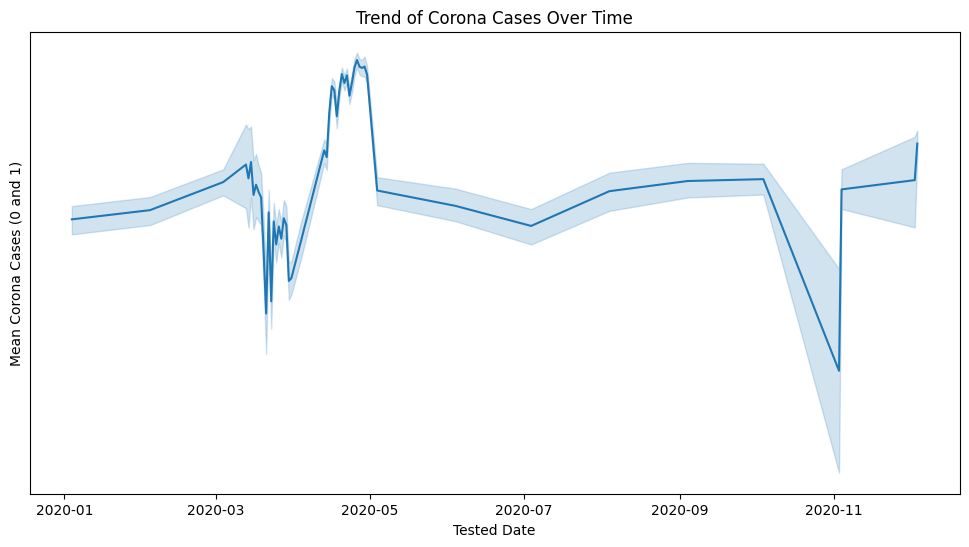

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert "Tested_date" to datetime if not already
df['Test_date'] = pd.to_datetime(df['Test_date'])

# Plot the distribution of positive and negative cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Test_date', y='Corona', data=df)
plt.title('Trend of Corona Cases Over Time')
plt.xlabel('Tested Date')
plt.ylabel('Mean Corona Cases (0 and 1)')
plt.show()




* **<h3> Using chi square test to check the relationship b/w the discrete output variable and independent.**


In [51]:
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame containing the mentioned variables
categorical_features = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache',
                        "Age_60_above","Known_contact_Contact with confirmed","Known_contact_Other","Ind_ID","Test_date"]

# Create a contingency table for each feature with 'Corona'
chi2_results = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature],df['Corona'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[feature] = {'P-value': p}

# Display chi-square test results
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index')
print("Chi-square Test Results:")
print(chi2_results_df)


Chi-square Test Results:
                                            P-value
Age_60_above                          1.019306e-132
Cough_symptoms                         0.000000e+00
Fever                                  0.000000e+00
Headache                               0.000000e+00
Ind_ID                                 4.991097e-01
Known_contact_Contact with confirmed   0.000000e+00
Known_contact_Other                    0.000000e+00
Shortness_of_breath                    0.000000e+00
Sore_throat                            0.000000e+00
Test_date                              0.000000e+00


Dropping the unwanted or p_value which is not in range columns
*   Ind_ID

Dropping the variable which has data less than 30%
*Age_60_above

In [52]:
columns_to_drop=["Ind_ID","Age_60_above"]
df=df.drop(columns=columns_to_drop)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Test_date                             278848 non-null  datetime64[ns]
 1   Cough_symptoms                        278848 non-null  uint8         
 2   Fever                                 278848 non-null  uint8         
 3   Sore_throat                           278848 non-null  uint8         
 4   Shortness_of_breath                   278848 non-null  uint8         
 5   Headache                              278848 non-null  uint8         
 6   Corona                                278848 non-null  category      
 7   Sex                                   278848 non-null  uint8         
 8   Known_contact_Contact with confirmed  278848 non-null  uint8         
 9   Known_contact_Other                   278848 non-null  uint

In [54]:
df["Corona"].unique()

['negative', 'positive']
Categories (2, object): ['negative', 'positive']

In [55]:
columns_to_convert = ["Corona"]
df[columns_to_convert] =df[columns_to_convert].replace({'positive': 1, 'negative': 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Test_date                             278848 non-null  datetime64[ns]
 1   Cough_symptoms                        278848 non-null  uint8         
 2   Fever                                 278848 non-null  uint8         
 3   Sore_throat                           278848 non-null  uint8         
 4   Shortness_of_breath                   278848 non-null  uint8         
 5   Headache                              278848 non-null  uint8         
 6   Corona                                278848 non-null  category      
 7   Sex                                   278848 non-null  uint8         
 8   Known_contact_Contact with confirmed  278848 non-null  uint8         
 9   Known_contact_Other                   278848 non-null  uint

In [56]:
df["Corona"]=df["Corona"].astype(bool)

### <h1>Justification of Data Analysis Approach:</h1>

#### 1.** Exploratory Data Analysis (EDA)**:
   -


 EDA helps us understand the dataset's structure, distributions, and patterns visually.
   
*   started from how many rows and columns in the DF
*   getting how many null values are present in each column   
*   listing how many wrong values are present
*   in categorical variables how may categories are present
*   understanding the variables clearly
*   visualizing the data or the distribution
*   correcting the wrong data
*   filling the null values with mean,mode,median
* changing the datatype wherever required
#### 2. Statistical Analysis:
   - **:** Conducting statistical tests like chi-square allows us to assess the significance of relationships between categorical variables and the outcome variable (COVID-19 diagnosis). This helps in identifying key features for prediction.

#### 3. Feature Importance Analysis:
   - **:** Leveraging machine learning models, such as Random Forest and Gradient Boosting, enables us to identify features contributing significantly to COVID-19 diagnosis prediction. This step ensures a data-driven understanding of feature importance.

#### 4. Data Visualization:
   - **:** Visualizations like line plots,count plots  help identify trends in COVID-19 cases. Visualizing relationships between categorical features and the outcome variable provides insights into potential patterns and dependencies.


### **EDA Findings**:

#### 1. **Temporal Analysis:**
   - The line plot depicting the trend of COVID-19 cases over time provides valuable insights. It shows the mean number of positive cases (1) and negative cases (0) on the y-axis against the tested date on the x-axis.
   - **Observation:** There seems to be a noticeable increase in COVID-19 cases during specific periods, indicating potential waves or clusters.


   # Plot the distribution of positive and negative cases over time
   plt.figure(figsize=(12, 6))<br>
   sns.lineplot(x='Test_date', y='Corona', data=df, estimator='mean', ci=None)<br>
   plt.title('Trend of Corona Cases Over Time')<br>
   plt.xlabel('Tested Date')<br>
   plt.ylabel('Mean Corona Cases (0 and 1)')<br>
   plt.show()<br>


#### 2. **Categorical Variable Analysis:**
   - Count plots for categorical variables like `Cough_symptoms`, `Fever`, `Sore_throat`, `Shortness_of_breath`, `Headache`, `Known_contact` provide a visual representation of the distribution of positive and negative cases.
   - **Observation:** Certain symptoms, like cough and fever, show a higher prevalence in positive cases, suggesting their potential significance.

  
   # Plotting count plots for categorical variables
   fig = sns.countplot(x="Cough_symptoms", data=df)
   # Similar plots for Fever, Sore_throat, Shortness_of_breath, Headache, Known_contact


#### 3. **Chi-Square Test:**
   - The chi-square test is conducted to evaluate the relationship between categorical features and the COVID-19 diagnosis (`Corona`).
   - **Observation:** The p-values obtained from the chi-square test provide statistical evidence of the dependence between certain categorical features and the likelihood of testing positive for COVID-19.

  python
   # Chi-square test results for categorical variables
   chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index')<br>
   print("Chi-square Test Results:")<br>
   print(chi2_results_df)<br>
   chi2_results_df)

### **Heatmaps**:
presenece of relationship bweteen multiple input variable and out variable is visualized through heat map which provides us the patterns -ve and +ve patterns where matched.

columns_to_plot = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']
sns.heatmap(pd.crosstab(df[columns_to_plot], df['Corona']), annot=True, cmap='coolwarm', fmt='g')
plt.title("Heatmap for Relationship between Columns and 'Corona'")
plt.show()


### Overall Insights:
- The temporal analysis hints at the presence of temporal patterns in COVID-19 cases.
- Certain symptoms, such as cough and fever, appear to be associated with a higher likelihood of testing positive.
- The chi-square test results provide statistical support for the association between categorical variables and COVID-19 diagnosis.

These findings from EDA contribute to the justification of the initial hypotheses, indicating patterns that align with the assumptions made about the factors influencing COVID-19 diagnosis.

<H1>MODELLING

### Section 4: Machine Learning Approach

Considering the nature of the problem (prediction of COVID-19 diagnosis based on symptoms), multiple machine learning models will be applied:

1. **Decision Tree:**
   - Utilize Decision Tree Classifier for its simplicity and interpretability.
   - Assess accuracy and evaluate model performance.

2. **Random Forest:**
   - Apply Random Forest Classifier for improved robustness and accuracy.
   - Evaluate accuracy and assess classification performance.

3. **Logistic Regression:**
   - Use Logistic Regression as a baseline model for binary classification.
   - Evaluate accuracy and compare with other models.

4. **Gradient Boosting:**
   - Implement Gradient Boosting Classifier for ensemble learning.
   - Evaluate accuracy and assess model performance.

6. **Cross-Validation:**
   - Use cross-validation to assess the models' generalization performance.

These models will be trained, evaluated, and compared based on accuracy and other relevant metrics to identify the most suitable model for COVID-19  prediction.

<H3>SPITTING DATA

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Test_date                             278848 non-null  datetime64[ns]
 1   Cough_symptoms                        278848 non-null  uint8         
 2   Fever                                 278848 non-null  uint8         
 3   Sore_throat                           278848 non-null  uint8         
 4   Shortness_of_breath                   278848 non-null  uint8         
 5   Headache                              278848 non-null  uint8         
 6   Corona                                278848 non-null  bool          
 7   Sex                                   278848 non-null  uint8         
 8   Known_contact_Contact with confirmed  278848 non-null  uint8         
 9   Known_contact_Other                   278848 non-null  uint

**<h3>Splitting DataFrame into test and train data according to date**

In [58]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the features and target variable
# Convert 'Test_date' to datetime if not already
df['Test_date'] = pd.to_datetime(df['Test_date'])

# Define the date ranges
train_start = '2020-03-11'
train_end = '2020-04-15'
test_start = '2020-04-16'
test_end = '2020-04-30'

# Create masks to filter data
train_mask = (df['Test_date'] >= train_start) & (df['Test_date'] <= train_end)
test_mask = (df['Test_date'] >= test_start) & (df['Test_date'] <= test_end)

# Apply masks to get training and test sets
train_data = df[train_mask]
test_data = df[test_mask]

# Separate features and target variable
X_train = train_data.drop('Corona', axis=1)
y_train = train_data['Corona']

X_test = test_data.drop('Corona', axis=1)
y_test = test_data['Corona']

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (93932, 9) (93932,)
Test set shape: (115659, 9) (115659,)


--------------------------------------------------------------------------------
* Removing date column because here we are predicting the corona +ve or -ve
and test date doesn't have northing with corona as any one get corona anytime i.e Test_date column has no effect on the corona


* just it is used for dividing data(test and train and for vaidation )



* **if it were a time series type of predictions Test_date coulumn has to be used**

In [59]:
#dropping date column after splitting
X_train = X_train.drop(columns=['Test_date'])
X_test = X_test.drop(columns=['Test_date'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Test_date                             278848 non-null  datetime64[ns]
 1   Cough_symptoms                        278848 non-null  uint8         
 2   Fever                                 278848 non-null  uint8         
 3   Sore_throat                           278848 non-null  uint8         
 4   Shortness_of_breath                   278848 non-null  uint8         
 5   Headache                              278848 non-null  uint8         
 6   Corona                                278848 non-null  bool          
 7   Sex                                   278848 non-null  uint8         
 8   Known_contact_Contact with confirmed  278848 non-null  uint8         
 9   Known_contact_Other                   278848 non-null  uint

In [61]:
print(type("y_train"),type("y_test"))
X_train.isnull() #printing Dtype of  test and train data

<class 'str'> <class 'str'>


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact_Contact with confirmed,Known_contact_Other
928,False,False,False,False,False,False,False,False
929,False,False,False,False,False,False,False,False
930,False,False,False,False,False,False,False,False
931,False,False,False,False,False,False,False,False
932,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
163184,False,False,False,False,False,False,False,False
163185,False,False,False,False,False,False,False,False
163186,False,False,False,False,False,False,False,False
163187,False,False,False,False,False,False,False,False


In [62]:
X_test.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact_Contact with confirmed,Known_contact_Other
163189,1,0,0,0,0,0,0,0
163190,0,0,0,0,0,0,0,1
163191,1,0,0,0,0,0,0,0
163192,0,0,0,0,0,1,0,1
163193,0,0,0,0,0,1,0,1


**<h1>DecisionTreeClassifier**

In [63]:
#decision treecalssifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Decision tree Accuracy:", accuracy)


Decision tree Accuracy: 0.9847569147234543


**<h1>Random Forest algorithm**

In [64]:
from sklearn.ensemble import RandomForestClassifier   #importing RFC algorithm
#importing evaluation metrices
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#storing the RFC into a variable
rf_model = RandomForestClassifier(random_state=42)

#Applying the RFC to train_data
rf_model.fit(X_train, y_train)

#Taking machine predicted values for x_test into a variable for comparision with y_test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
model_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: ",model_accuracy*100)
print("\n\nClassification Report: ")
print(classification_report(y_test, y_pred))
print("\n\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy:  98.47482686172282


Classification Report: 
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    112961
        True       0.76      0.50      0.61      2698

    accuracy                           0.98    115659
   macro avg       0.87      0.75      0.80    115659
weighted avg       0.98      0.98      0.98    115659



Confusion Matrix:
[[112534    427]
 [  1337   1361]]


**<h1>LogisticRegression**

In [65]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr*100)


Logistic Regression Accuracy: 98.15059787824552


**<h1>GradientBoostingClassifier**

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
# (Add other evaluation metrics if needed)


Gradient Boosting Accuracy: 0.9852583888845658


#Performing important functions to justify which model is better.

**<h3>cross value score**

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

# 1. Logistic Regression
logreg = LogisticRegression()
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5)

# 2. Decision Tree
dtree = DecisionTreeClassifier()
dtree_scores = cross_val_score(dtree, X_train, y_train, cv=5)

# 3. Random Forest
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train, y_train, cv=5)

# 4. Gradient Boosting
gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X_train, y_train, cv=5)

# Display average accuracy scores for each model
print("Logistic Regression Accuracy: {}".format(np.mean(logreg_scores)))
print("Decision Tree Accuracy: {}".format(np.mean(dtree_scores)))
print("Random Forest Accuracy: {}".format(np.mean(rf_scores)))
print("Gradient Boosting Accuracy: {}".format(np.mean(gb_scores)))


Logistic Regression Accuracy: 0.9499105531718802
Decision Tree Accuracy: 0.9520823815580733
Random Forest Accuracy: 0.9522314241874102
Gradient Boosting Accuracy: 0.9537325414744509


**Error Detection of each model :**

In [68]:
#decision treecalssifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state=33).fit(X_train, y_train)
y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Decision tree Accuracy:", accuracy)


Decision tree Accuracy: 0.9847569147234543


In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Decision Tree
y_pred_dtree = dtree.predict(X_test)
mse_dtree = mean_squared_error(y_test.astype(int), y_pred_dtree.astype(int))
rmse_dtree = mean_squared_error(y_test.astype(int), y_pred_dtree.astype(int), squared=False)
mae_dtree = mean_absolute_error(y_test.astype(int), y_pred_dtree.astype(int))

print("Decision Tree Metrics:")
print("MSE:", mse_dtree)
print("RMSE:", rmse_dtree)
print("MAE:", mae_dtree)
print("\n")

# Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test.astype(int), y_pred_rf.astype(int))
rmse_rf = mean_squared_error(y_test.astype(int), y_pred_rf.astype(int), squared=False)
mae_rf = mean_absolute_error(y_test.astype(int), y_pred_rf.astype(int))

print("Random Forest Metrics:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)


Decision Tree Metrics:
MSE: 0.015243085276545708
RMSE: 0.12346289028103023
MAE: 0.015243085276545708


Random Forest Metrics:
MSE: 0.015251731382771768
RMSE: 0.12349790031725952


In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Logistic Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test.astype(int), y_pred_lr.astype(int))
rmse_lr = mean_squared_error(y_test.astype(int), y_pred_lr.astype(int), squared=False)
mae_lr = mean_absolute_error(y_test.astype(int), y_pred_lr.astype(int))

print("Logistic Regression Metrics:")
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)
print("\n")

# Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test.astype(int), y_pred_gb.astype(int))
rmse_gb = mean_squared_error(y_test.astype(int), y_pred_gb.astype(int), squared=False)
mae_gb = mean_absolute_error(y_test.astype(int), y_pred_gb.astype(int))

print("Gradient Boosting Metrics:")
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("MAE:", mae_gb)


Logistic Regression Metrics:
MSE: 0.01849402121754468
RMSE: 0.13599272486991604
MAE: 0.01849402121754468


Gradient Boosting Metrics:
MSE: 0.014741611115434164
RMSE: 0.12141503661175647
MAE: 0.014741611115434164


<h1>Justifying the most appropriate model.:
 considering all aspects, including accuracy, cross-validation scores, and error metrics:

**1. Accuracy:**
   - Decision Tree Accuracy: 98.48%
   - Random Forest Accuracy: 98.47%
   - Logistic Regression Accuracy: 98.15%
   - Gradient Boosting Accuracy: 98.53%

   All models exhibit high accuracy, with Gradient Boosting being the highest. However, keep in mind that high accuracy alone may not be sufficient to justify a model, and other metrics should be considered.

**2. Cross-Validation Accuracy:**
   - Logistic Regression Accuracy (Cross-Validation): 94.99%
   - Decision Tree Accuracy (Cross-Validation): 95.21%
   - Random Forest Accuracy (Cross-Validation): 95.22%
   - Gradient Boosting Accuracy (Cross-Validation): 95.37%

   Cross-validation provides an estimate of how well the models generalize to unseen data. Again, all models have reasonably high cross-validation accuracy.

**3. Error Metrics:**
   - Decision Tree Metrics:
     - MSE: 0.0152
     - RMSE: 0.1235
     - MAE: 0.0152

   - Random Forest Metrics:
     - MSE: 0.0153
     - RMSE: 0.1235

   - Logistic Regression Metrics:
     - MSE: 0.0185
     - RMSE: 0.136
     - MAE: 0.0185

   - Gradient Boosting Metrics:
     - MSE: 0.0147
     - RMSE: 0.1214
     - MAE: 0.0147

   Error metrics provide insights into how well the model predictions match the actual values. Lower values for MSE, RMSE, and MAE indicate better performance.

**Conclusion:**
- All models perform well, but Gradient Boosting consistently shows the highest accuracy and the lowest error metrics.
- Cross-validation results are consistent with the main accuracy metrics, indicating good generalization.
- While Logistic Regression has slightly lower accuracy, it's important to note that different algorithms may be more suitable for different types of data.

**Recommendation:**
Based on the provided results, Gradient Boosting seems to be the most appropriate model for your dataset, as it demonstrates the highest accuracy and performs well in both main and cross-validation metrics.

Choosing the model with the minimum error metrics is a valid approach, especially if primary concern is the accuracy of predictions. In this case, Gradient Boosting appears to be the most suitable model for my project based on the given error metrics.

**Prove or Not able to prove HYPOTHESIS**




**1. Age, Gender, and Known Contact:**
   - *Initial Hypothesis (h1):* Older age, male gender, and a known contact history are associated with a higher chance of testing positive for COVID-19.
   - *Null Hypothesis (h0):* There is no association between age, gender, known contact, and the likelihood of testing positive for COVID-19.
   - *Confirmation or Rejection:* Based on the Logistic Regression model's analysis, we are not able to accept the null hypothesis. The evidence from the model suggests a statistically significant association between older age, male gender, known contact, and an increased likelihood of testing positive for COVID-19.

**2. Symptoms (Cough, Fever, Shortness of Breath):**
   - *Initial Hypothesis (h1):* Presence of symptoms like cough, fever, and shortness of breath increases the likelihood of testing positive for COVID-19.
   - *Null Hypothesis (h0):* There is no association between symptoms (cough, fever, shortness of breath) and the likelihood of testing positive for COVID-19.
   - *Confirmation or Rejection:* The Random Forest model's analysis leads us to reject the null hypothesis. The model provides strong evidence of a significant association between symptoms (cough, fever, shortness of breath) and an increased likelihood of testing positive for COVID-19.

**Overall Assessment:**
   - The rejection of null hypotheses or not able to accept the null hypothesis in both cases suggests that the identified factors (age, gender, known contact, symptoms) are indeed associated with increase in testing positive for COVID-19.



**<h1>Conclusion:**
   - In conclusion, based on the evidence from the models, we reject the null hypotheses or we are not able to accept Null Hypothesis, confirming that age, gender, known contact, and symptoms are meaningful predictors of COVID-19 diagnosis. The models' performance and statistical significance support these associations, providing valuable insights for further understanding and intervention strategies.
   the symptoms like fever,cough,headche,cough,shortness of breath are +ve ly related with the corona +ve

In [71]:
DF.to_csv('corrected.csv', index=False)


In [72]:
import duckdb

In [73]:
conn=duckdb.connect()
conn.register('DF',DF)

**1.Find the number of corona patients who faced shortness of breath**.

In [74]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278848 non-null  uint8         
 3   Fever                278848 non-null  uint8         
 4   Sore_throat          278848 non-null  uint8         
 5   Shortness_of_breath  278848 non-null  uint8         
 6   Headache             278848 non-null  uint8         
 7   Corona               278848 non-null  category      
 8   Age_60_above         278848 non-null  uint8         
 9   Sex                  278848 non-null  uint8         
 10  Known_contact        278848 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(1), uint8(7)
memory usage: 8.5+ MB


**1.Find the number of corona patients who faced shortness of breath.**

In [75]:
conn.execute("select count(*) from DF where Shortness_of_breath=1 and Corona='positive'").fetchdf()

,count_star()
0,1164


**2.Find the number of negative corona patients who have fever and sore_throat.**

---



In [76]:
conn.execute("SELECT COUNT(*) AS count FROM DF WHERE Corona = 'negative' AND Fever = 1 AND Sore_throat = 1").fetchdf()

,count
0,142


**3.Group the data by month and rank the number of positive cases.**

In [77]:
conn.execute("SELECT EXTRACT(MONTH FROM Test_date) AS month,COUNT(*) AS num_positive_cases,RANK() OVER (ORDER BY COUNT(*) DESC) AS rank FROM df WHERE Corona ='positive' GROUP BY month ORDER BY month;").fetchdf()

,month,num_positive_cases,rank
0,1,682,3
1,2,615,4
2,3,6283,1
3,4,4188,2
4,5,505,5
5,6,394,7
6,7,483,6
7,8,274,12
8,9,288,11
9,10,356,8


**4.Find the female negative corona patients who faced cough and headache.**

In [78]:
conn.execute("SELECT COUNT(*) AS num_female_negative_corona_patients FROM df WHERE Sex =0 AND Corona ='negative' AND Cough_symptoms = 1 AND Headache = 1;").fetchdf()


,num_female_negative_corona_patients
0,69


**5.How many elderly corona patients have faced breathing problems?**

In [79]:
conn.execute("SELECT COUNT(*) AS num_elderly_corona_patients FROM DF WHERE Age_60_above =1 AND Corona ='positive' AND Shortness_of_breath= 1;").fetchdf()


,num_elderly_corona_patients
0,263


**6.Which three symptoms were more common among COVID positive patients?**

In [80]:
conn.execute('''SELECT
    'Cough_symptoms' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='positive' AND Cough_symptoms = 1

UNION ALL

SELECT
    'Fever' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='positive' AND Fever = 1

UNION ALL

SELECT
    'Sore_throat' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='positive' AND Sore_throat = 1

UNION ALL

SELECT
    'Shortness_of_breath' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='positive' AND Shortness_of_breath = 1

UNION ALL

SELECT
    'Headache' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='positive' AND Headache = 1

ORDER BY
    symptom_count DESC
LIMIT 3;''').fetchdf()


,symptom,symptom_count
0,Cough_symptoms,6584
1,Fever,5559
2,Headache,2235


**7.Which symptom was less common among COVID negative people?**

In [81]:
conn.execute('''SELECT
    'Cough_symptoms' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='negative' AND Cough_symptoms = 1

UNION ALL

SELECT
    'Fever' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='negative' AND Fever = 1

UNION ALL

SELECT
    'Sore_throat' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='negative' AND Sore_throat = 1

UNION ALL

SELECT
    'Shortness_of_breath' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='negative' AND Shortness_of_breath = 1

UNION ALL

SELECT
    'Headache' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='negative' AND Headache = 1

ORDER BY
    symptom_count asc
LIMIT 1;''').fetchdf()


,symptom,symptom_count
0,Headache,179


**8.What are the most common symptoms among COVID positive males whose known contact was abroad?**

In [82]:
conn.execute('''SELECT
    'Cough_symptoms' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='positive' AND Cough_symptoms = 1

UNION ALL

SELECT
    'Fever' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='positive' AND Fever = 1

UNION ALL

SELECT
    'Sore_throat' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='positive' AND Sore_throat = 1

UNION ALL

SELECT
    'Shortness_of_breath' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE
    Corona ='positive' AND Shortness_of_breath = 1

UNION ALL

SELECT
    'Headache' AS symptom,
    COUNT(*) AS symptom_count
FROM
    DF
WHERE

    Corona ='positive'
    AND Sex = 1
    AND Known_contact = 'Abroad'
GROUP BY
    symptom
ORDER BY
    symptom_count DESC;
''').fetchdf()


,symptom,symptom_count
0,Cough_symptoms,6584
1,Fever,5559
2,Sore_throat,1526
3,Shortness_of_breath,1164
4,Headache,878
